Copyright 2021 Takehiro Ajioka

In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt
from scipy import io
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc, roc_auc_score

In [2]:
# Load data
signal = io.loadmat('../data/signal_5mice.mat')
runrest = io.loadmat('../data/runrest_5mice.mat')

In [3]:
plt.rcParams["font.size"] = 18

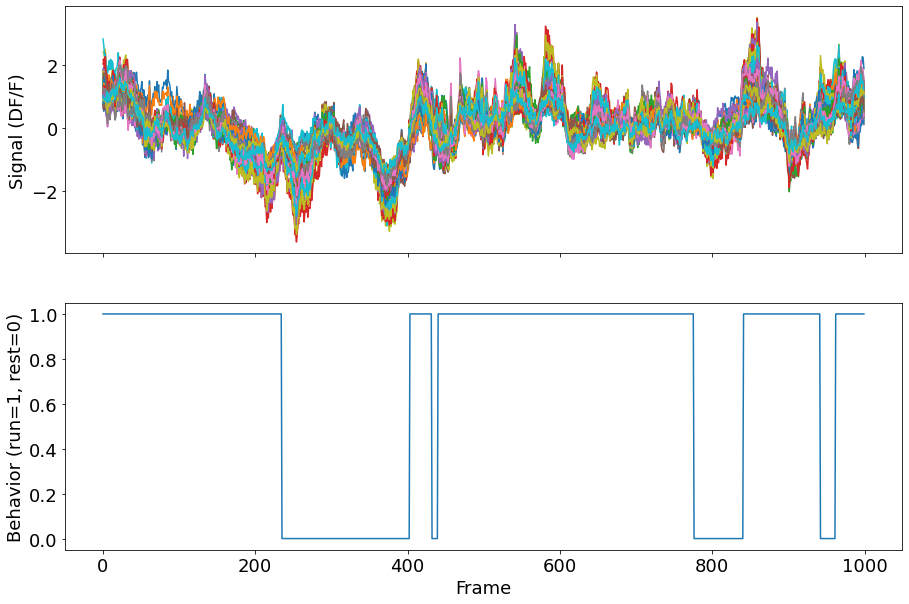

In [4]:
# Example of data
i = 2 # mouse No.
j = 5 # experiment No.
range_start = 10000
range_end = 11000
s = signal['signal'+str(i)][0,j-1]
b = runrest['runrest'+str(i)][0,j-1]
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(15, 10))
plt.xlabel("Frame")
ax[0].plot(s[:,range_start:range_end].transpose())
ax[0].set(ylabel="Signal (DF/F)")
ax[1].plot(b[:,range_start:range_end].transpose())
ax[1].set(ylabel="Behavior (run=1, rest=0)")
plt.show()

# Pearson's correlation coefficient (for behavior)

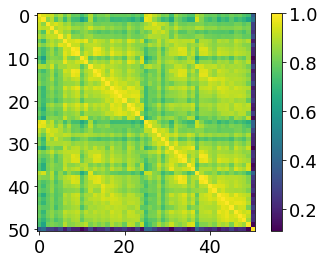

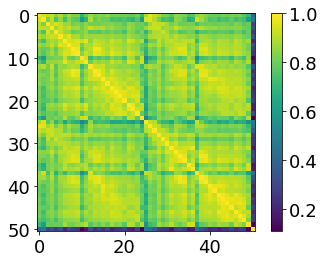

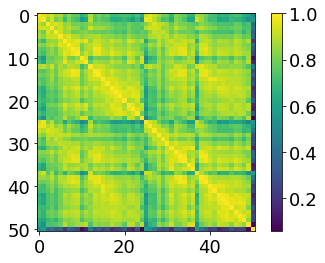

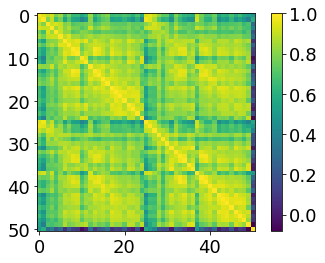

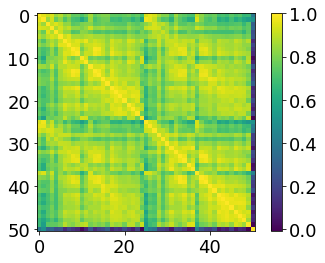

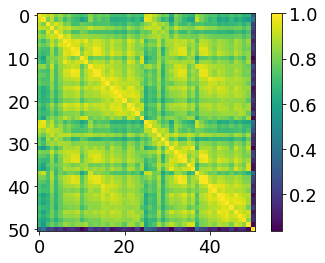

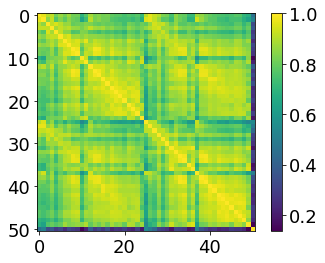

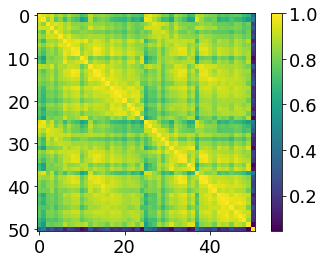

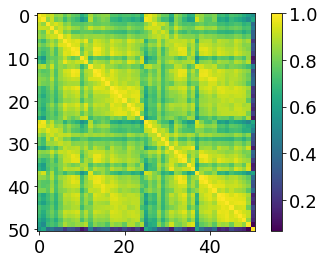

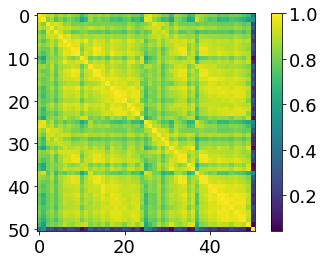

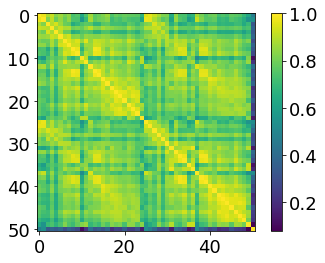

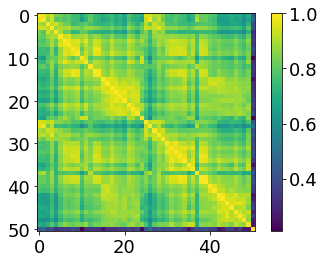

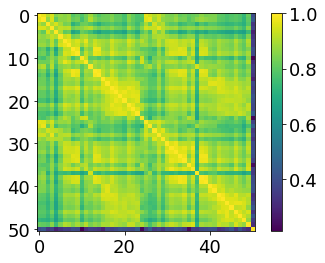

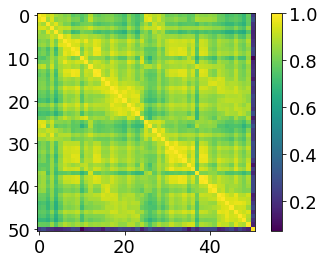

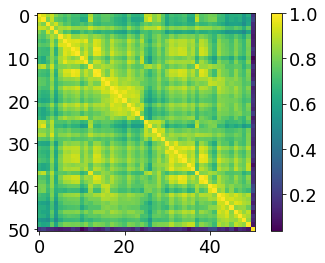

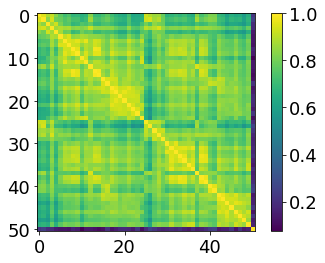

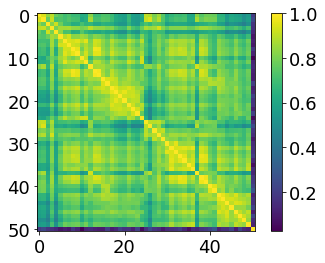

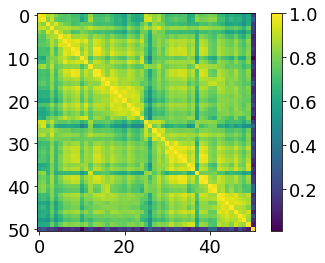

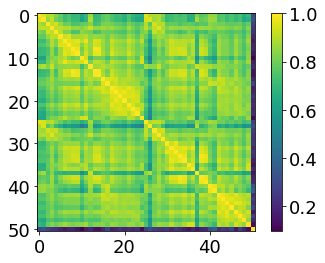

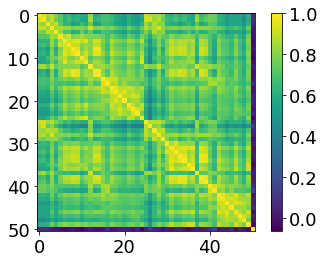

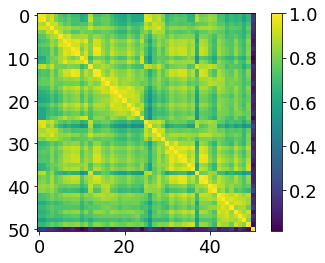

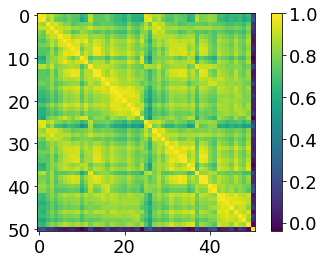

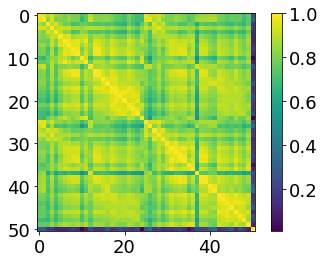

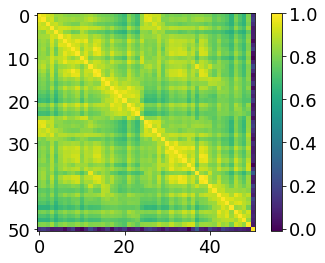

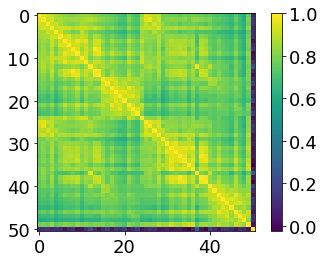

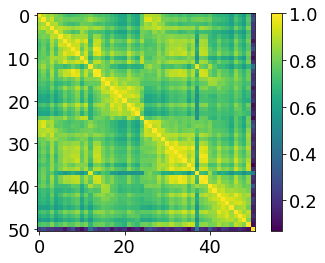

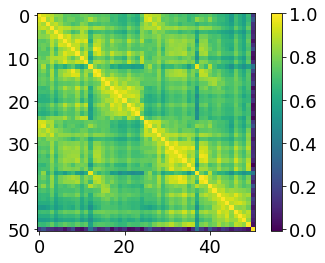

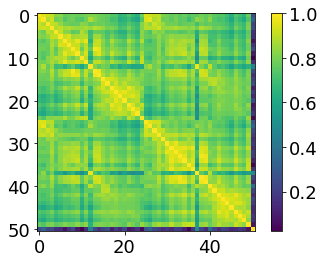

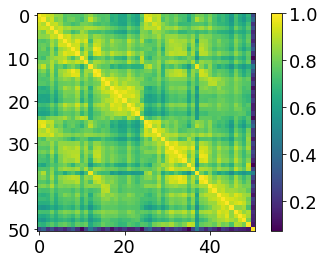

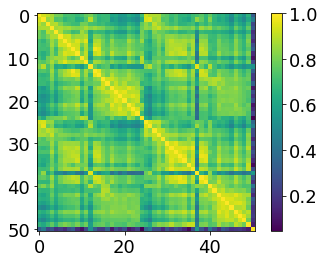

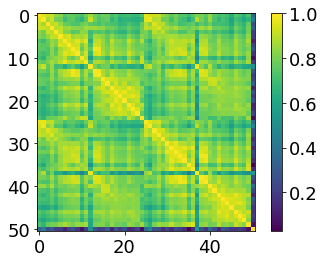

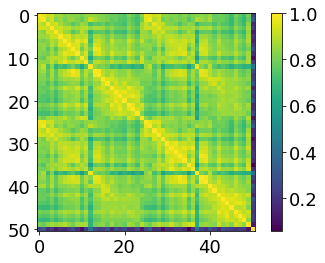

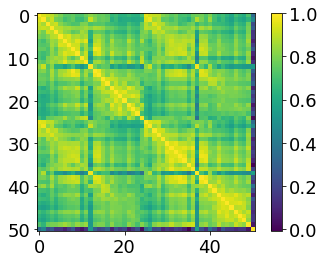

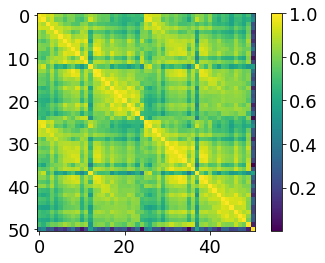

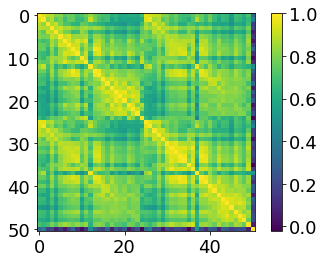

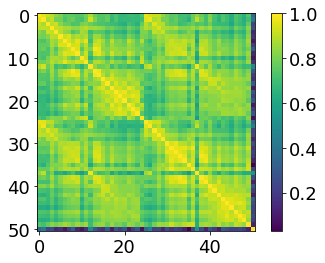

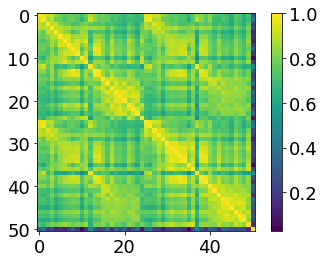

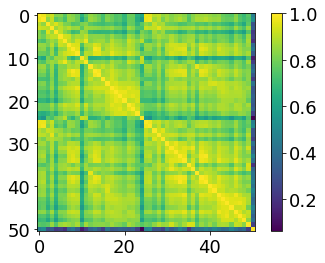

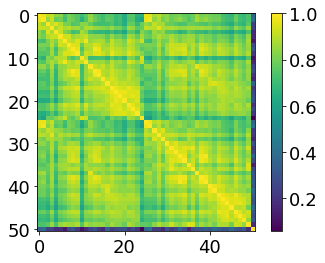

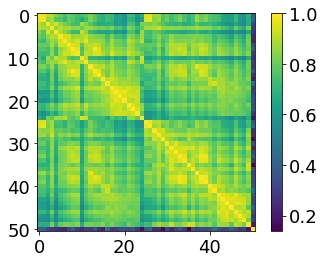

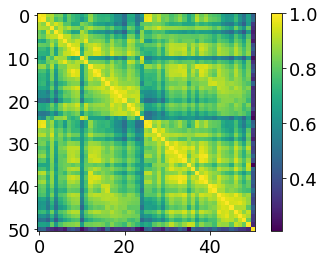

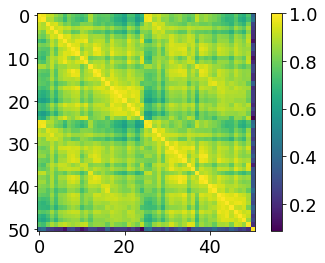

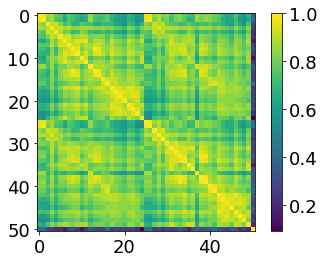

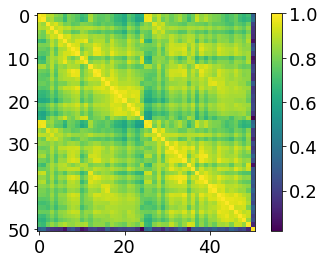

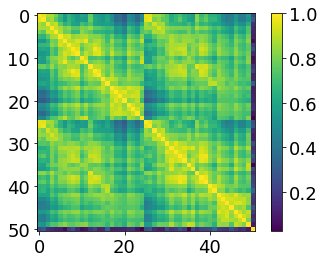

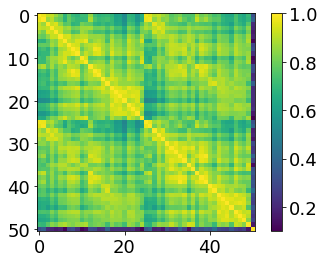

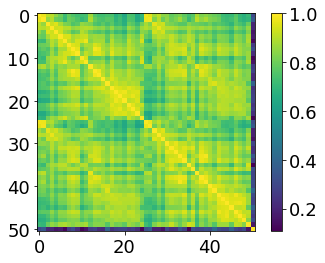

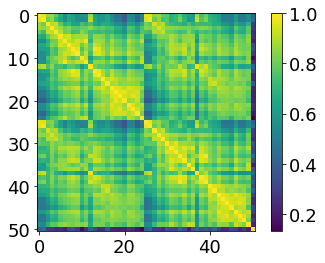

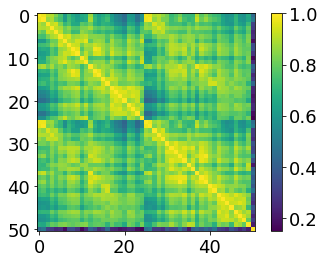

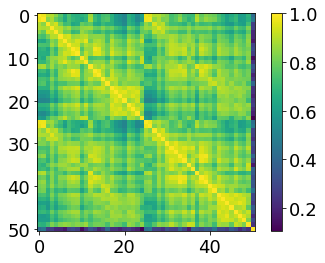

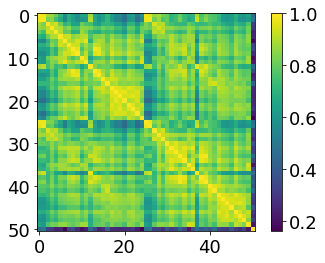

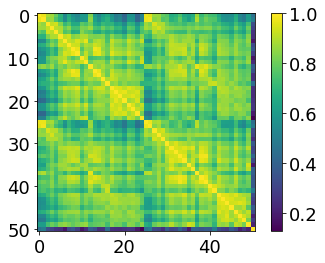

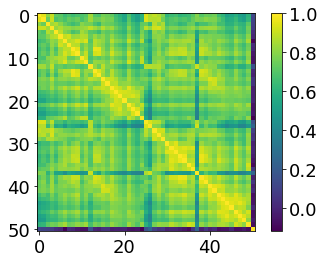

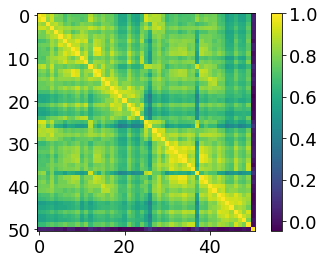

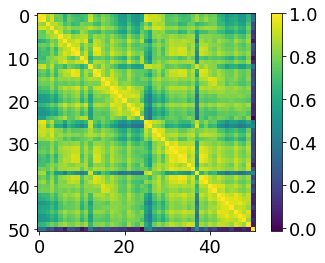

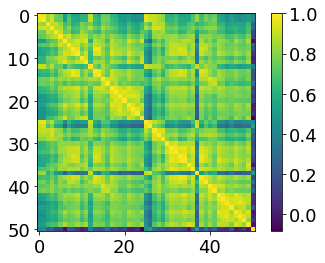

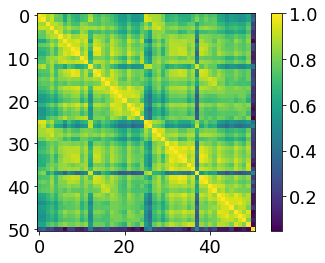

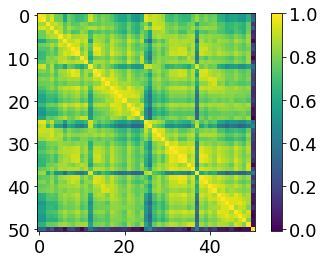

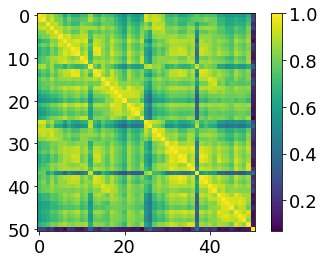

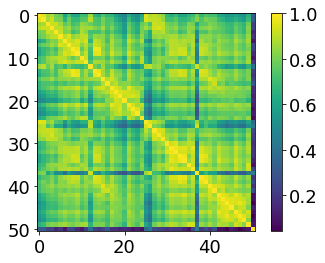

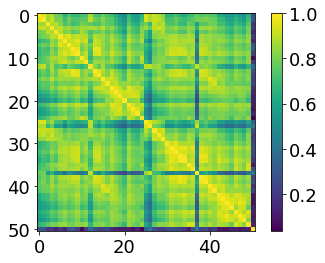

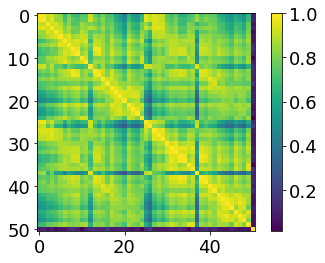

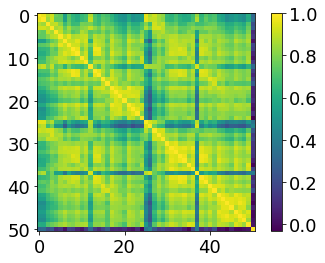

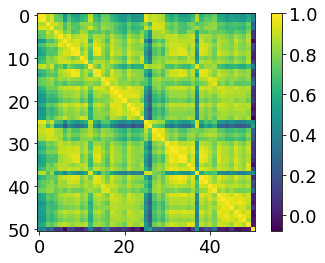

In [10]:
corr_coef = []
for Mouse in range(1,6):
    signals = signal['signal'+str(Mouse)]
    runrests = runrest['runrest'+str(Mouse)]
    coefs = numpy.zeros([50,signals.shape[1]])
    for i in range(signals.shape[1]):
        X = signals[0,i].transpose()
        Y = runrests[0,i].reshape(-1)
        corr = numpy.corrcoef(X, Y, rowvar=False)
        plt.imshow(corr)
        plt.colorbar()
        plt.show()
        coefs[:,i] = corr[-1,:-1]
    corr_coef.append(coefs)

In [11]:
CORR = numpy.hstack(corr_coef)

In [12]:
numpy.savetxt('Pearson_coef.csv', CORR)

In [13]:
CORR.mean(axis=1)

array([0.32154338, 0.37322449, 0.23273768, 0.24923747, 0.17220269,
       0.19054548, 0.12321412, 0.22305113, 0.24687545, 0.16890993,
       0.07690681, 0.15980903, 0.32646121, 0.2298343 , 0.19184972,
       0.1955055 , 0.28628972, 0.15390697, 0.19796878, 0.18602088,
       0.21438043, 0.16008647, 0.15676345, 0.19433201, 0.06663721,
       0.34163298, 0.38737022, 0.24898876, 0.21567454, 0.17042268,
       0.21757895, 0.1748303 , 0.22917132, 0.24704882, 0.1852341 ,
       0.0831411 , 0.21040813, 0.3700786 , 0.24307654, 0.23742529,
       0.25683326, 0.27870638, 0.16021375, 0.20031591, 0.18360214,
       0.23176099, 0.1684225 , 0.18272869, 0.17758903, 0.1034372 ])

Text(0, 0.5, "Pearson's Correlation Coefficient for behavior")

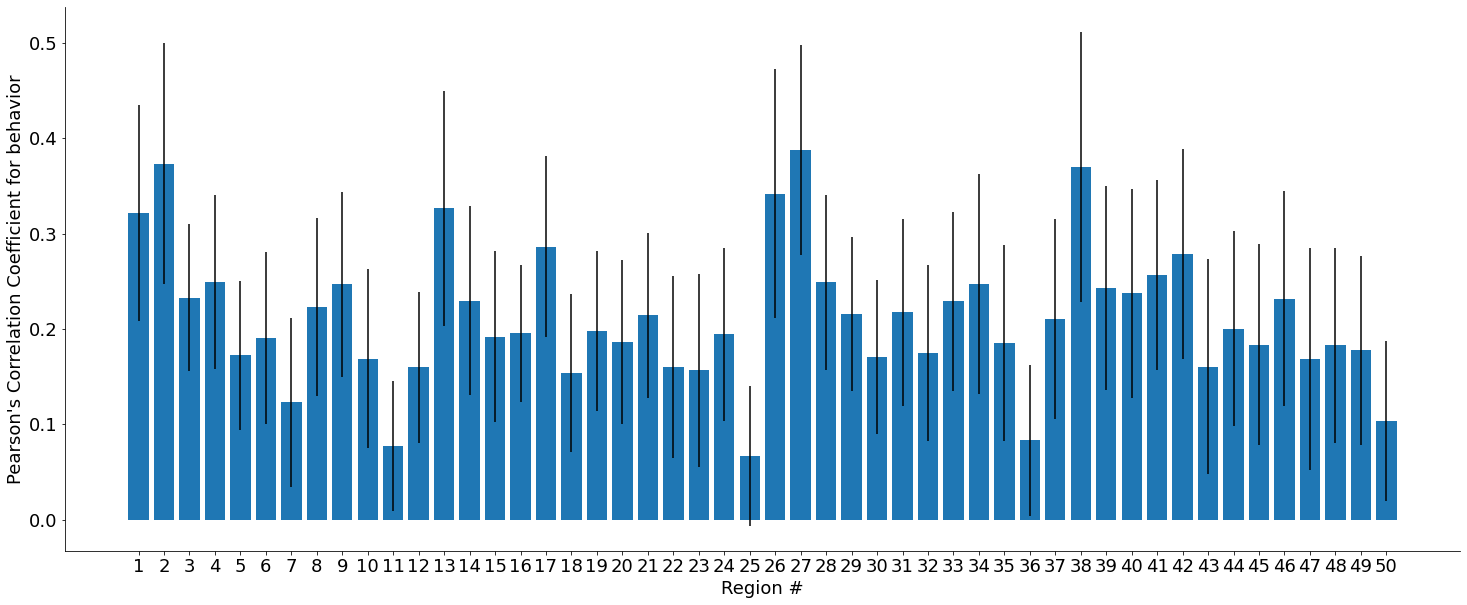

In [20]:
# Barplot average
x = numpy.array(range(1,51))
fig, ax = plt.subplots(figsize =(25, 10))
ax.bar(x, CORR.mean(axis=1), yerr=CORR.std(axis=1))
plt.xticks( numpy.arange(1,51), numpy.arange(1,51))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel("Region #")
plt.ylabel("Pearson's Correlation Coefficient for behavior")

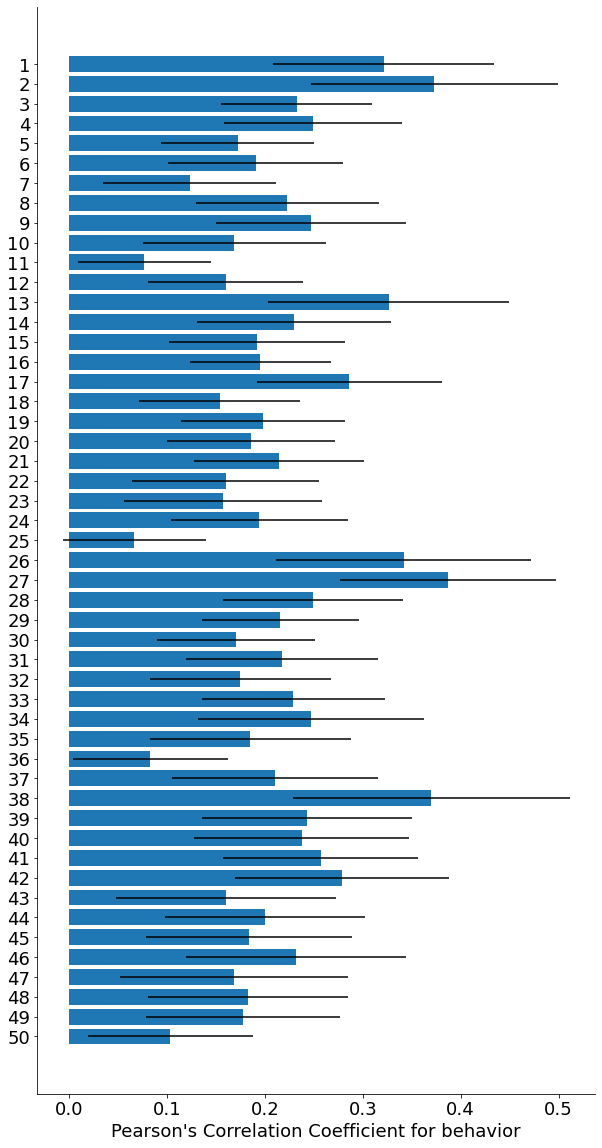

In [21]:
# Barplot average
x = numpy.array(range(1,51))
fig, ax = plt.subplots(figsize =(10, 20))
ax.barh(x, CORR.mean(axis=1), xerr=CORR.std(axis=1))
plt.yticks( numpy.arange(1,51), numpy.arange(1,51))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel("Region #")
plt.xlabel("Pearson's Correlation Coefficient for behavior")
ax.invert_yaxis()